# Transfer Learning for Cats and Dogs Classification (with ResNet50) #

- Let's apply Transfer Learning reusing the ResNet50 Neural Network, which is used for object classification. 
- A pre-trained ResNet50 with imagenet dataset will be load into a new model in order to classify dogs and cat images.
- The new model is made of: 
    - (1) Base NN model pre-trained 
    - (2) New dense layers
- Citation: Olga Russakovsky, Jia Deng, Hao Su, Jonathan Krause, Sanjeev Satheesh, Sean Ma, Zhiheng Huang, Andrej Karpathy, Aditya Khosla, Michael Bernstein, Alexander C. Berg and Li Fei-Fei. (* = equal contribution) ImageNet Large Scale Visual Recognition Challenge. arXiv:1409.0575, 2014.
- Paper: https://arxiv.org/abs/1409.0575
- Dataset: https://www.kaggle.com/tongpython/cat-and-dog

In [2]:
########### Basic Data Handling Import Set ###########
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Other:
import random
import zipfile

In [ ]:
########### Tensorflow Import ###########

# ON CONDA: pip install tensorflow==2.0.0-alpha0 # If any problem -> pip uninstall numpy -> pip install numpy
import tensorflow as tf
from tensorflow.keras import layers, models

## Importing ResNet50 model for Transfer Learning ##

In [4]:
model = tf.keras.applications.ResNet50(weights = 'imagenet')

102858752/102853048 [==============================] - 22s 0us/step


## Testing Model ##

* Let's test the ResNet50 model using a bicycle image.

In [5]:
zip_object = zipfile.ZipFile('Transfer-Learning-Data-1.zip', mode='r')
zip_object.extractall('./')
zip_object.close()

In [6]:
def ResNet50_Image_Converter(image_path):

    sample_image = tf.keras.preprocessing.image.load_img(image_path, target_size=(224,224))
    plt.imshow(sample_image)
    sample_image = tf.keras.preprocessing.image.img_to_array(sample_image)
    sample_image = np.expand_dims(sample_image, axis =0)
    sample_image = tf.keras.applications.resnet50.preprocess_input(sample_image)
    
    return sample_image

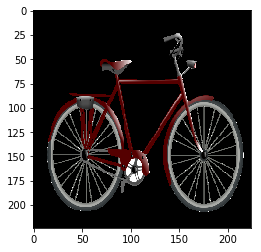

In [7]:
image_path = r'Transfer Learning Data/bicycle.png'

sample_image = ResNet50_Image_Converter(image_path)

In [8]:
predictions = model.predict(sample_image)
print('predictions: ', tf.keras.applications.resnet50.decode_predictions(predictions, top = 5))

40960/35363 [==================================] - 0s 1us/step
predictions:  [[('n02835271', 'bicycle-built-for-two', 0.6637823), ('n03792782', 'mountain_bike', 0.053819414), ('n04482393', 'tricycle', 0.0522482), ('n03599486', 'jinrikisha', 0.017589998), ('n03930313', 'picket_fence', 0.008201973)]]


## Transfer Learning Use and Build Model ##

In [10]:
base_model = tf.keras.applications.ResNet50(weights = 'imagenet', include_top = False) # Take off top dense layers
base_model.summary()

C:\Users\Mafeus\Anaconda3\lib\site-packages\keras_applications\resnet50.py:265: UserWarning: The output shape of `ResNet50(include_top=False)` has been changed since Keras 2.2.0.
  warnings.warn('The output shape of `ResNet50(include_top=False)` '


Model: "resnet50"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            [(None, None, None,  0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, None, None, 3 0           input_3[0][0]                    
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, None, None, 6 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_conv1 (BatchNormalizationV1) (None, None, None, 6 256         conv1[0][0]                      
___________________________________________________________________________________________

In [11]:
# Taking the ResNet50 base layers output and connecting to the new dense layers:
x = base_model.output
x = tf.keras.layers.GlobalAveragePooling2D()(x)
x = tf.keras.layers.Dense(1024, activation='relu')(x)
x = tf.keras.layers.Dense(1024, activation='relu')(x)
x = tf.keras.layers.Dense(1024, activation='relu')(x)
x = tf.keras.layers.Dense(512, activation='relu')(x)
preds = tf.keras.layers.Dense(2, activation='softmax')(x)
model = tf.keras.models.Model(inputs = base_model.input, outputs = preds)
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            [(None, None, None,  0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, None, None, 3 0           input_3[0][0]                    
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, None, None, 6 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_conv1 (BatchNormalizationV1) (None, None, None, 6 256         conv1[0][0]                      
______________________________________________________________________________________________

In [12]:
for i, layer in enumerate(model.layers):
    print(i, layer.name)

0 input_3
1 conv1_pad
2 conv1
3 bn_conv1
4 activation_98
5 pool1_pad
6 max_pooling2d_2
7 res2a_branch2a
8 bn2a_branch2a
9 activation_99
10 res2a_branch2b
11 bn2a_branch2b
12 activation_100
13 res2a_branch2c
14 res2a_branch1
15 bn2a_branch2c
16 bn2a_branch1
17 add_32
18 activation_101
19 res2b_branch2a
20 bn2b_branch2a
21 activation_102
22 res2b_branch2b
23 bn2b_branch2b
24 activation_103
25 res2b_branch2c
26 bn2b_branch2c
27 add_33
28 activation_104
29 res2c_branch2a
30 bn2c_branch2a
31 activation_105
32 res2c_branch2b
33 bn2c_branch2b
34 activation_106
35 res2c_branch2c
36 bn2c_branch2c
37 add_34
38 activation_107
39 res3a_branch2a
40 bn3a_branch2a
41 activation_108
42 res3a_branch2b
43 bn3a_branch2b
44 activation_109
45 res3a_branch2c
46 res3a_branch1
47 bn3a_branch2c
48 bn3a_branch1
49 add_35
50 activation_110
51 res3b_branch2a
52 bn3b_branch2a
53 activation_111
54 res3b_branch2b
55 bn3b_branch2b
56 activation_112
57 res3b_branch2c
58 bn3b_branch2c
59 add_36
60 activation_113
61 res

In [13]:
# Let's make sure the tf fit function will only train the top layers of the model:

for layer in model.layers[:175]:
    layer.trainable = False

for layer in model.layers[175:]:
    layer.trainable = True

In [14]:
# Let's define a object iteration to convert data to ResNet50 format:
train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(preprocessing_function=tf.keras.applications.resnet50.preprocess_input)

* Load Data (Train Data = cats and dogs images .jpg)

In [15]:
# Define train data:
train_generator = train_datagen.flow_from_directory('Transfer Learning Data/train', target_size = (224,224), 
                                                    color_mode = 'rgb', batch_size = 32,
                                                    class_mode = 'categorical',
                                                    shuffle = True)

Found 202 images belonging to 2 classes.


In [17]:
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit_generator(generator=train_generator, epochs = 10)

Epoch 1/10
7/7 [==============================] - 117s 17s/step - loss: 0.9774 - accuracy: 0.6386
Epoch 2/10
7/7 [==============================] - 111s 16s/step - loss: 0.1376 - accuracy: 0.9554
Epoch 3/10
7/7 [==============================] - 109s 16s/step - loss: 0.3233 - accuracy: 0.9257
Epoch 4/10
7/7 [==============================] - 108s 15s/step - loss: 0.1444 - accuracy: 0.9356
Epoch 5/10
7/7 [==============================] - 109s 16s/step - loss: 0.0330 - accuracy: 1.0000
Epoch 6/10
7/7 [==============================] - 110s 16s/step - loss: 0.0315 - accuracy: 0.9950
Epoch 7/10
7/7 [==============================] - 106s 15s/step - loss: 0.0733 - accuracy: 0.9752
Epoch 8/10
7/7 [==============================] - 105s 15s/step - loss: 0.0525 - accuracy: 0.9703
Epoch 9/10
7/7 [==============================] - 104s 15s/step - loss: 0.0032 - accuracy: 1.0000
Epoch 10/10
7/7 [==============================] - 109s 16s/step - loss: 0.0046 - accuracy: 1.0000


## Model Results ##

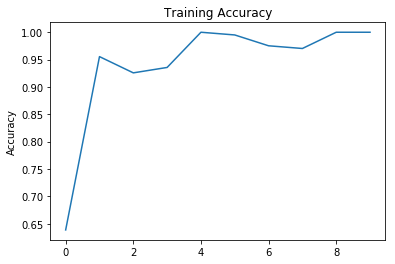

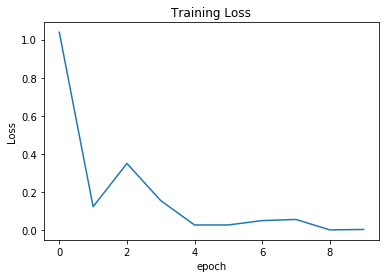

In [18]:
# Checking Model Loss and Accuracy:

acc = history.history['accuracy']
loss = history.history['loss']

plt.figure()
plt.plot(acc, label='Training Accuracy')
plt.ylabel('Accuracy')
plt.title('Training Accuracy')

plt.figure()
plt.plot(loss, label='Training Loss')
plt.ylabel('Loss')
plt.title('Training Loss')
plt.xlabel('epoch')
plt.show()

Dog? [[5.3521774e-07 9.9999952e-01]]


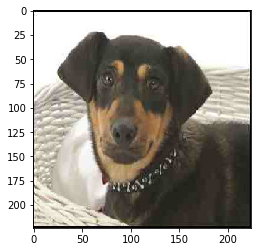

In [22]:
image_path_dog = r'Transfer Learning Data/dog.309.jpg'
sample_image_dog = ResNet50_Image_Converter(image_path_dog)
predictions = model.predict(sample_image_dog)
print('Dog?', predictions)

Cat? [[9.999999e-01 9.983192e-08]]


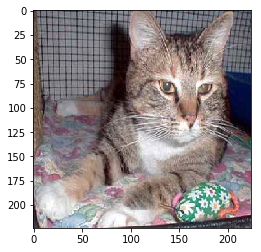

In [23]:
image_path_cat = r'Transfer Learning Data/cat.282.jpg'
sample_image_cat = ResNet50_Image_Converter(image_path_cat)
predictions = model.predict(sample_image_cat)
print('Cat?', predictions)